# Ejercicios con Árboles de decisión, Gradient Boosting y Random Forest

In [1]:
# Ignore user warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

# Load relevant packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

# Machine Learning
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline
plt.style.use('ggplot')

## Introducción

**Contexto empresarial:** Usted ha sido contratado como científico de datos por una gran compañía de bienes raíces en su oficina de Seattle. Su trabajo es ayudar a los residentes de Seattle que deseen vender su casa a determinar un precio óptimo para vender su propiedad a fin de maximizar sus ganancias y al mismo tiempo poder encontrar compradores dispuestos. Para hacer esto, a la empresa le gustaría que construyera un modelo de precios para los bienes raíces de Seattle, a fin de maximizar la probabilidad de ayudar a los residentes a cerrar las ventas (y así maximizar las comisiones para la empresa).

**Problema de negocios:** Su tarea es construir un modelo que utilice datos de ventas anteriores en Seattle para recomendar un precio de venta óptimo para cualquier propiedad en particular.

**Contexto analítico:** El conjunto de datos proporcionado se recuperó de Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction) e incluye los precios de venta de casas en el estado de Washington (condado de King, donde se encuentra Seattle) entre mayo de 2014 y mayo de 2015. 

## Estandarización de la información

En muchas ocasiones estamos relacionando distintos conjuntos de información, por ejemplo, queremos predecir cuál sera la cosecha de platano en el año, teniendo en cuenta la cantidad de precipitación (litro) y el piso térmico de la zona (categórica). 

Dicha estimación puede tener impresiciones, si no se tiene en cuenta la unidad de análisis de esa información. Por ello, se deben realizar dos procesos diferentes, con el fin de no sumar peras con manzanas.




### Estandarización:

Este proceso permite homogenizar la información, de la siguiente manera

$$x_{E} = \frac{x_{i}- \bar{X} }{DS(X)}$$

### Normalización:

Este proceso permite homogenizar la información, de la siguiente manera

$$x_{N} = \frac{x_{i}-min(X)}{max(X)-min(X)}$$


### Ejercicio 1
1. Programe 2 funciones que normalicen y estandarizen la información de una base de datos

2. Simule el modelo de predicción de cosechas, con varibles aleatorias y estime un OLS

3. Estandarice o Normalice la información del punto 2 y estime nuevamente ¿Qué resultados obtuvo?


In [91]:
cosecha = np.random.randint(100, size = 100)
precipitacion = np.random.randint(10000, size = 100)
piso_termico = np.random.randint(1,5, size= 100)

In [4]:
def normalizacion(array):
    norm = []
    for i in array:
        n = (i-min(array))/(max(array)-min(array))
        norm.append(n)
    return(precipitacion)

In [77]:
normalizacion(precipitacion)
precipitacion_norm = pd.Series(norm)
precipitacion_norm.describe()

count    100.000000
mean       0.528989
std        0.265972
min        0.000000
25%        0.312205
50%        0.528305
75%        0.720767
max        1.000000
dtype: float64

In [81]:
normalizacion(piso_termico)
piso_termico_norm = pd.Series(norm)
piso_termico_norm.describe()

count    100.000000
mean       0.500000
std        0.386355
min        0.000000
25%        0.000000
50%        0.666667
75%        1.000000
max        1.000000
dtype: float64

In [5]:
def estandarizacion(array):
    estand = []
    for i in array:
        e = (i-np.mean(array)/np.std(array))
        estand.append(e)
    return(estand)

In [73]:
estandarizacion(precipitacion)
precipitacion_est = pd.Series(estand)
precipitacion_est.describe()

count     100.000000
mean     5293.311609
std      2649.880843
min        22.991609
25%      3133.491609
50%      5286.491609
75%      7203.991609
max      9985.991609
dtype: float64

In [74]:
estandarizacion(piso_termico)
piso_termico_est = pd.Series(estand)
piso_termico_est.describe()

count     200.000000
mean     2646.821917
std      3245.365192
min        -1.167775
25%         0.832225
50%        12.411917
75%      5285.241609
max      9985.991609
dtype: float64

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [93]:
cosecha = pd.Series(cosecha)
precipitacion = pd.Series(precipitacion)
piso_termico = pd.Series(piso_termico)

In [120]:
data = pd.concat([cosecha,precipitacion,piso_termico],
                axis=1, keys=['Cosechas','Precipitacion',
                             'Piso_térmico'])
data

,Cosechas,Precipitacion,Piso_térmico
0,72,2322,3
1,75,1370,1
2,36,8429,3
3,45,1005,4
4,14,409,3
...,...,...,...
95,14,5093,2
96,18,7194,2
97,66,4308,2
98,60,4165,4


In [121]:
data = pd.concat([data, precipitacion_norm,
                 precipitacion_est,
                 piso_termico_norm,
                 piso_termico_est], axis=1,
                keys=['Cosechas','Precipitacion',
                             'Piso_térmico'])
data

,Cosechas,Precipitacion,Piso_térmico,0,1,2,3
0,72.0,2322.0,3.0,0.527452,5277.991609,0.666667,5277.991609
1,75.0,1370.0,1.0,0.810700,8099.991609,0.666667,8099.991609
2,36.0,8429.0,3.0,0.934357,9331.991609,0.000000,9331.991609
3,45.0,1005.0,4.0,0.697380,6970.991609,1.000000,6970.991609
4,14.0,409.0,3.0,0.873030,8720.991609,0.000000,8720.991609
...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,-1.167775
196,NaN,NaN,NaN,NaN,NaN,NaN,1.832225
197,NaN,NaN,NaN,NaN,NaN,NaN,1.832225
198,NaN,NaN,NaN,NaN,NaN,NaN,-1.167775


In [ ]:
lm = smf.ols()

## Áboles de decisión

Son modelos de predicción que segmentan el conjunto de información por medio de unas *reglas de decisión* o lógicas, con el fin de pronosticar un valor

Para continuar con el ejercicio, primero realicemos una predicción de los salarios de los jugadores de la NBA

In [122]:
nba = pd.read_excel('jugadores_nba.xlsx')
nba.dropna(inplace=True)

In [123]:
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,2020-02-06 00:00:00,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,2020-06-06 00:00:00,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,2020-05-06 00:00:00,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,2020-08-06 00:00:00,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


In [124]:
nba['Team'].value_counts()

New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Philadelphia 76ers        14
Milwaukee Bucks           14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Brooklyn Nets             13
Washington Wizards        13
Phoenix Suns              13
Memphis Grizzlies         13
Sacramento Kings          13
Charlotte Hornets         13
Los Angeles Lakers        12
Dallas Mavericks          12
Chicago Bulls             12
Indiana Pacers            12
Golden State Warriors     12
Boston Celtics            12
New York Knicks           11
Atlanta Hawks             11
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Utah Jazz                 10
Toronto Raptors           10
Miami Heat                10
Orlando Magic             10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: Team, dtype: int64

In [125]:
nba['Position'].value_counts()

SG    87
PF    81
PG    76
SF    71
C     49
Name: Position, dtype: int64

In [126]:
nba = nba[['Weight', 'Age', 'Salary']]
e = StandardScaler()
nba_e = e.fit_transform(nba)
X = nba_e[:,0:1]
y = nba_e[:,2]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Identifiquemos el nivel de profundidad del árbol de decisión

In [128]:
accuracies = list()
max_attributes = 10
depth_range = range(1, max_attributes + 1)
fold_accuracy = []
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeRegressor(criterion='mse',
                                       min_samples_split=20,
                                       min_samples_leaf=5,
                                       max_depth = depth)
    model = tree_model.fit(X_train, y_train) 
    valid_acc = model.score(X_train, y_train) # calculamos la precision con el segmento de validacion
    fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.032149
         2          0.044344
         3          0.055339
         4          0.066941
         5          0.080244
         6          0.089459
         7          0.096085
         8          0.101055
         9          0.104920
        10          0.108013


In [0]:
tree_model = DecisionTreeRegressor(criterion='mse',min_samples_split=20,min_samples_leaf=5,max_depth = 4)
model = tree_model.fit(X_train, y_train) 

In [130]:
# overfiting
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,y_pred_train))
print(mean_squared_error(y_test,y_pred))

0.8278741777302876
1.1859420110662955


### Ejercicio 2

1. Para la base de datos de Boston, calcule un árbol de decisión, identificando las variables más importantes

2. Tome el mejor modelo de la clase anterior y compare con el árbol de decisión

In [7]:
from sklearn import preprocessing

In [48]:
houses = pd.read_csv('../clase 13/kc_house_data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [50]:
houses['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [55]:
houses['renovated'] = houses['yr_renovated'] > 0

In [89]:
houses['renovated'].value_counts()

False    20699
True       914
Name: renovated, dtype: int64

In [92]:
int(True)

1

In [110]:
Renovated = []
for i in houses['renovated']:
    if i == True:
        uno = 1
        Renovated.append(uno)
    else:
        cero = 0
        Renovated.append(cero)

In [111]:
len(Renovated)

21613

In [113]:
Renovated = pd.Series(Renovated)
Renovated.value_counts()

0    20699
1      914
dtype: int64

In [116]:
houses['renovated'] = Renovated

In [117]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

In [119]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [124]:
#'np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
#' + condition + view + grade + yr_built + lat*C(waterfront) + I(lat**2) '
#'+ long + C(zipcode)'
        
modelo = houses[['price','sqft_living','yr_renovated','sqft_lot','bedrooms',
                 'floors','bathrooms','condition','view','grade','yr_built','waterfront',
                 'lat','long','zipcode', 'renovated']]
#modelo
# Modelo normalizado 
min_max_scaler = preprocessing.MinMaxScaler()
modelo_norm = min_max_scaler.fit_transform(modelo)
modelo_norm = pd.DataFrame(modelo_norm)
#modelo_norm

In [125]:
modelo2 = modelo.copy()

In [132]:
hola.value_counts()

False    21613
Name: sqft_lot, dtype: int64

In [133]:
modelo2['log(living)*renovated'] = np.log(modelo['sqft_living'])*modelo['renovated']
modelo2['log(lot)'] = np.log(modelo2['sqft_lot'])
modelo2['lat*waterfront'] = modelo2['lat']*modelo2['waterfront']
modelo2['lat**2'] = modelo2['lat']**2
modelo2['log(price)'] = np.log(modelo2['price'])

In [134]:
modelo2_norm = min_max_scaler.fit_transform(modelo2)
modelo2_norm = pd.DataFrame(modelo2_norm)

# Árbol de Regresión

In [328]:
def MSE(predict,target):
    mse = (1/len(target)) * sum((target-predict)**2)
    return(mse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [357]:
colnames = modelo.columns.values.tolist()
predictores = colnames[1:]
target = colnames[0]

In [139]:
from sklearn.model_selection import train_test_split

In [358]:
X = modelo[predictores]
X = X.values
X = X[:,np.newaxis,5]
y = modelo[target]
y = y.values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [359]:
reg_tree = DecisionTreeRegressor(min_samples_split=30,
                                min_samples_leaf=10,
                                max_depth=10,
                                random_state = 8)

In [360]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=8, splitter='best')

In [361]:
X_test.shape

(6484, 1)

In [362]:
predicciones = reg_tree.predict(X_test)

In [363]:
predicciones.shape

(6484,)

In [364]:
data = {
    'Predicciones': predicciones,
    'price_target': y_test
}

In [365]:
data = pd.DataFrame(data)

In [366]:
data.reset_index(level=0,inplace=True)
data

,index,Predicciones,price_target
0,0,410207.832370,645000.0
1,1,983544.748166,1795000.0
2,2,453665.289902,300000.0
3,3,659520.794118,696500.0
4,4,459752.379075,414050.0
...,...,...,...
6479,6479,551931.418318,897000.0
6480,6480,534785.239945,525000.0
6481,6481,453665.289902,536000.0
6482,6482,551931.418318,680000.0


In [367]:
X_grid = np.arange(min(X_test),max(X_test), 0.1)

In [368]:
X_grid.shape

(80,)

In [369]:
X_grid = X_grid.reshape(len(X_grid),1)

In [370]:
X_grid.shape

(80, 1)

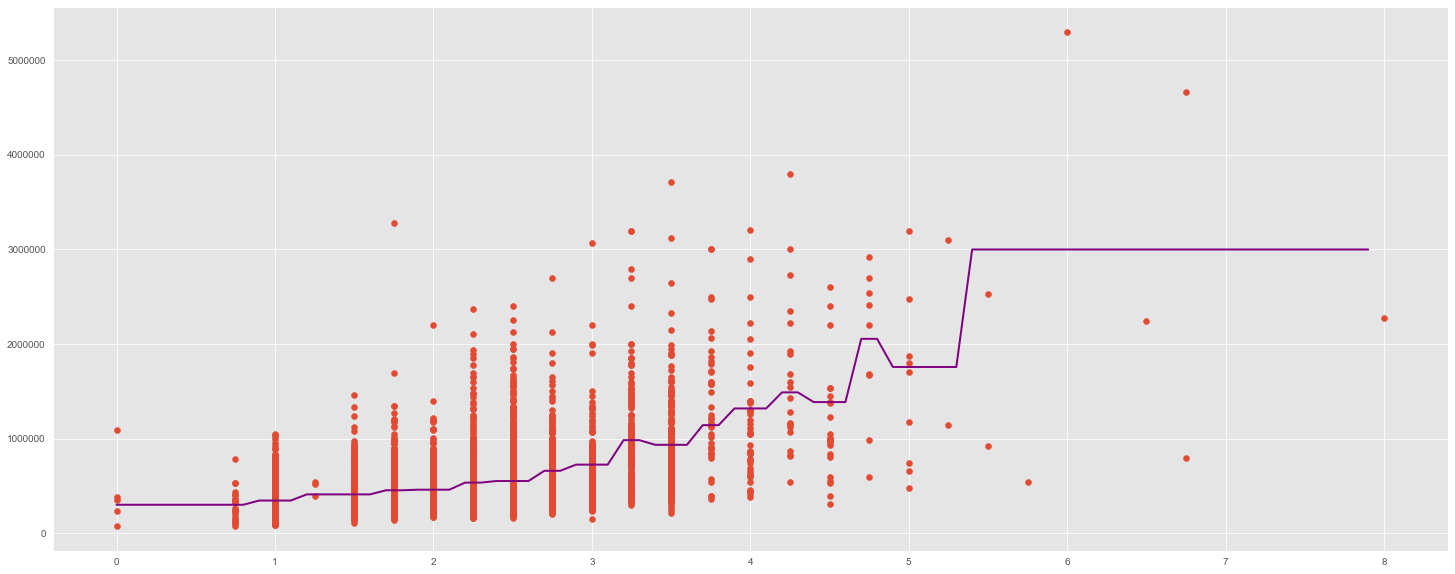

In [371]:
plt.figure(figsize=(25,10))
plt.scatter(X_test,y_test)
plt.plot(X_grid, reg_tree.predict(X_grid), color = 'purple', linewidth = 2 )
plt.show() 


In [372]:
MSE(predicciones,y_test)

83059932968.43787

In [373]:
reg_tree.score(X_train,y_train)

0.3512749060234077

# Modelo normalizado

In [308]:
modelo_norm.columns.values.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [309]:
predictores  = modelo_norm.iloc[:,1:]
X = predictores.values
objetivo  = modelo_norm.iloc[:,0]
y = objetivo.values
X = X[:,np.newaxis,5]

In [310]:
X.shape

(21613, 1)

In [311]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [318]:
reg_tree2  = DecisionTreeRegressor( max_depth=20, min_samples_leaf=30, min_samples_split=30)
reg_tree2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [313]:
predicciones2 = reg_tree2.predict(X_test)

In [314]:
data = {
    'Predicciones2': predicciones2,
    'price_target': y_test
}
data = pd.DataFrame(data)
data

,Predicciones2,price_target
0,0.035316,0.034098
1,0.027418,0.032787
2,0.062489,0.094164
3,0.062489,0.097443
4,0.075851,0.099219
...,...,...
6479,0.062489,0.034098
6480,0.035316,0.054164
6481,0.050197,0.071482
6482,0.120899,0.046557


In [315]:
X_grid = np.arange(min(X_test),max(X_test),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

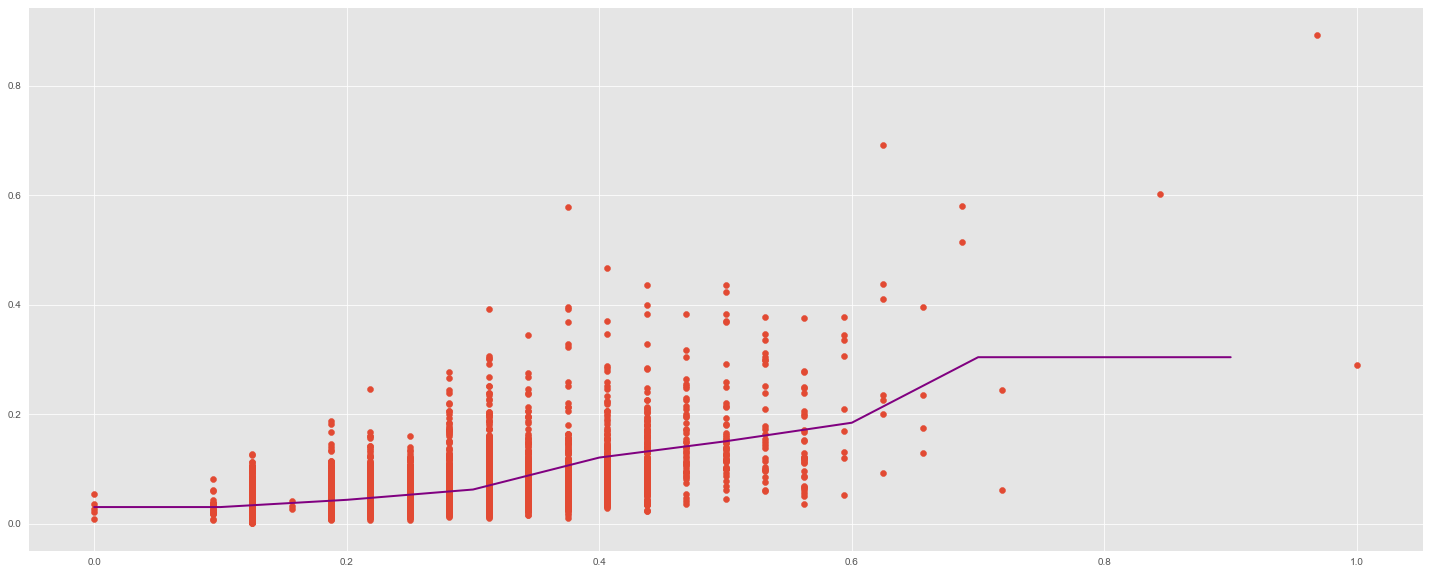

In [319]:
plt.figure(figsize=(25,10))
plt.scatter(X_test,y_test)
plt.plot(X_grid, reg_tree2.predict(X_grid), color = 'purple', linewidth = 2 )
plt.show() 


In [320]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(reg_tree2, out_file ='tree.dot', 
               feature_names =['Boston Houses Price'])

In [ ]:
import os
from graphviz import Source
file = open('tree.dot', 'r')#READING DOT FILE
text=file.read()
Source(text)

In [327]:
import pydot
import os
print(os.name)

nt


In [323]:
from graphviz import Digraph

In [329]:
MSE(predicciones2,y_test)

0.0018245209193807675

In [334]:
reg_tree2.score(X_train,y_train)

0.33703943518788637